In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.datasets import make_blobs

# Data to work on

In [2]:
X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.5, random_state=2)

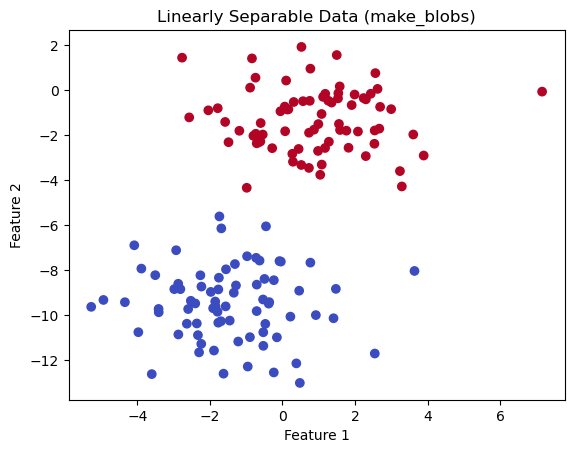

In [3]:
fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c =y , cmap = 'coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Linearly Separable Data (make_blobs)')
plt.show()

# Model class

In [4]:
class Perceptron:
    def __init__(self, lr, n_iter):
        self.lr = lr
        self.n_iter = n_iter
        self.w = None
        self.b = None
    
    def activation(self, arr):
        return np.where(arr >= 0, 1, 0)
    
    def fit(self, X, y):
        samples, features = X.shape
        self.w = np.zeros(features)
        self.b = 0

        self.errors_per_epoch = [] 
        

        for _ in range(self.n_iter):
            error = 0
            for idx, value in enumerate(X):
                linear_output = np.dot(value, self.w) + self.b
                y_pred = self.activation(linear_output)

                # update rule
                update = self.lr *(y[idx] - y_pred)
                self.w += update * value
                self.b += update

                if update != 0:
                    error += 1
            self.errors_per_epoch.append(error)
            if error == 0: 
                break

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        y_pred = self.activation(linear_output)
        return y_pred
        

# utility functions

In [5]:
def train_test_split(X, y, ratio, shuffle = False, seed = False):
    if seed:
        np.random.seed(seed)
    if shuffle:
        index = np.arange(len(X))
        np.random.shuffle(index)
        X, y = X[index], y[index]
    divider = int(len(X) * ratio)
    train_X = X[: divider]
    test_X = X[divider: ]
    train_y = y[: divider]
    test_y = y[divider: ]
    return train_X, train_y, test_X, test_y

def standardize(train_X ,test_X):
    mean = train_X.mean(axis = 0)
    std = train_X.std(axis = 0)
    train_scaled = (train_X - mean) / std
    test_scaled = (test_X - mean) / std
    return train_scaled, test_scaled

def accuracy(y_true, y_pred):
        return np.mean(y_true == y_pred)

# Model execution

In [6]:
train_X, train_y, test_X, test_y = train_test_split(X, y , ratio = 0.7 , shuffle = True ,seed = 1)
train_X , test_X = standardize(train_X, test_X)

model = Perceptron(lr = 0.1, n_iter = 1000)
model.fit(train_X, train_y)

y_pred = model.predict(test_X)

# Model accuracy

In [7]:
f'model accuracy : {accuracy(test_y, y_pred)}'

'model accuracy : 1.0'

# Error Plot

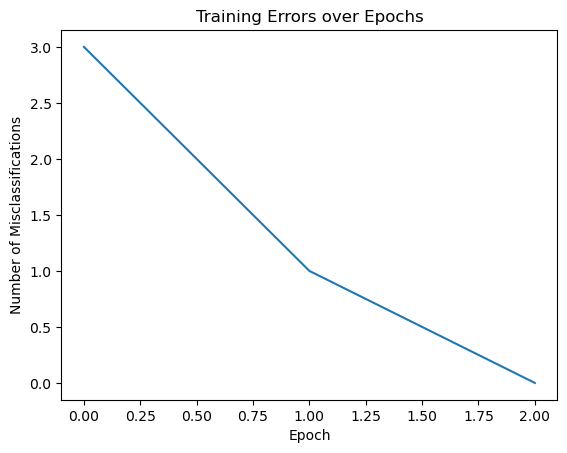

In [8]:
fig, ax = plt.subplots()
ax.plot(model.errors_per_epoch)
ax.set_title("Training Errors over Epochs")
ax.set_xlabel("Epoch")
ax.set_ylabel("Number of Misclassifications")
plt.show()

# Decision Boundary

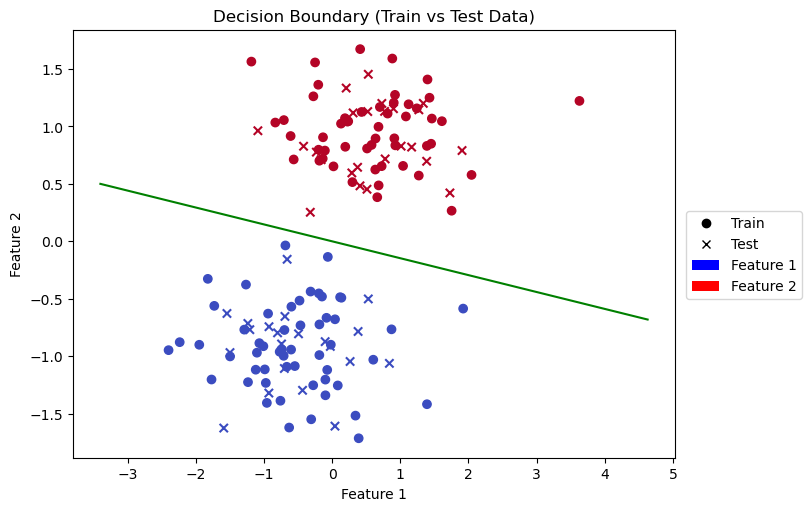

In [9]:
fig, ax = plt.subplots(figsize = (8, 5),layout='constrained')
ax.scatter(train_X[: , 0] , train_X[:, 1], c = train_y, cmap='coolwarm', marker = 'o' , label = 'Train')
ax.scatter(test_X[: , 0] , test_X[:, 1], c = test_y, cmap='coolwarm', marker = 'x' ,label =  'Test')

x_min, x_max = min(train_X[:, 0].min(), test_X[:, 0].min()) - 1 , max(train_X[:, 0].max(), test_X[:, 0].max()) +1
x_pts = np.linspace(x_min, x_max, 300)
y_pts = -((model.w [0] * x_pts)+ model.b) / model.w[1]
ax.plot(x_pts, y_pts, c = 'g')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.title("Decision Boundary (Train vs Test Data)")

legend_items = [
    Line2D([0], [0], marker='o', color='black', label='Train', linestyle='None'),
    Line2D([0], [0], marker='x', color='black', label='Test', linestyle='None'),
    Patch(facecolor='blue', label='Feature 1'),
    Patch(facecolor='red', label='Feature 2')
]
fig.legend(handles=legend_items , loc = 'outside right' , fontsize = 10)
plt.show()